<a href="https://colab.research.google.com/github/SofiaOldan/expert-octo-system/blob/main/Data_StoryTelling_Oldan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyzing Customer Spending Habits**

### **Introducción**

Analizar el comportamiento del consumidor es clave para el éxito de los modelos comerciales. Este DataSet contiene información sobre las compras realizadas por clientes en diferentes países y estados, en diferentes categorías y subcategorías de productos en el período 2015-2016. El objetivo del análisis es identificar patrones y tendencias en los datos para ayudar a la empresa a tomar decisiones en cuanto a las estrategias de ventas y marketing.

Se exploraron varias preguntas clave relacionadas con las categorías y subcategorías más vendidas, los países que generan más ganancias, las diferencias en la ganancia generada por género y edad, las relaciones entre la cantidad comprada y la ganancia generada, entre otras.

Este análisis proporciona información valiosa que puede ayudar a la empresa aumentar sus ganancias a través de la identificación de patrones y tendencias en los datos de las ventas efectuadas. Se podría obtener información sobre los cambios en la demanda de productos específicos a lo largo del tiempo, estudiar cómo la edad y el género del cliente afectan las decisiones de compra, así como también comparar diferentes mercados para analizar estrategias de precios de lanzamientos de nuevos productos o campañas promocionales.


 **Objetivo**. El objetivo de este estudio es generar un modelo que permita dar apoyo a la empresa para definir sus estrategias de compra y venta de sus productos y de marketing.


**Contexto Comercial**. Se esta trabajando para una empresa que vende productos relacionados con el ciclismo en diferentes países. La empresa busca optimizar sus procesos de venta con el fin de aumentar las ganancias y mejorar la satisfacción del cliente.

Se está trabajando con un equipo de científicos de datos.

**Problema Comercial**. El problema comercial que se aborda en este análisis es cómo identificar patrones y tendencias en los datos de las compras realizadas. Responder a preguntas que aborda el cliente.

**Contexto Analítico**. Se parte del Data Set [Analyzing Customer Spending Habits](https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa) de Vineet Bahl.

Este Data Set contiene detalles sobre fecha, año y mes de compra, edad y género del consumidor, país y estado donde se realizó la compra, categoría y subcategoría del producto comprado, cantidad, costo unitario, precio unitario y ingreso total de las ventas.


Algunas de las preguntas que se tratan de responder a través de este análisis son:

1 - ¿Cuál es nuestro cliente objetivo?

2 - ¿Como se comporta dicho cliente en relación a las compras?

3 - ¿Cuál es el país donde se generan las mayores compras?

4 - ¿Como se podrían aumentar las ganancias?


## **Definición del DataSet**

In [ ]:
# Importar librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Importar Drive, definir una variable con la ruta del DataSet y definir el DataFrame

from google.colab import drive
drive.mount('/content/gdrive')

path_file = ('/content/gdrive/MyDrive/DATA SCIENCE - Sofía Oldán/SalesForCourse_quizz_table.csv')

Sales = pd.read_csv(path_file)

Sales.head()

Mounted at /content/gdrive


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [ ]:
# Vemos las dimensiones del DataFrame

print(Sales.shape)

(34867, 16)


## Limpieza de DataSet

In [ ]:
# Se realiza un análisis de valores nulos en el DataFrame

Sales.isna().sum().sort_values(ascending = False)

Column1             32293
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
index                   0
Revenue                 0
dtype: int64

In [ ]:
# Copia del DataFrame original
Sales_copia = Sales.copy()

Sales_copia.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [ ]:
# Se elimina la columna Column1 del DataFrame debido a la cantidad de valores nulos

Sales.drop('Column1', axis=1, inplace=True)
Sales.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [ ]:
#Verifico que se eliminaron correctamente los valores nulos

if Sales.equals(Sales_copia):
    print("No se eliminaron valores nulos.")
else:
    print("Se eliminaron correctamente los valores nulos.")

Se eliminaron correctamente los valores nulos.


In [ ]:
# Se identifica y elimina la fila que presenta todos los valores nulos menos Revenue.

filas_con_nulos = Sales.isnull().any(axis=1)

print(Sales[filas_con_nulos])

       index Date  Year Month  Customer Age Customer Gender Country State  \
34866  34866  NaN   NaN   NaN           NaN             NaN     NaN   NaN   

      Product Category Sub Category  Quantity  Unit Cost  Unit Price  Cost  \
34866              NaN          NaN       NaN        NaN         NaN   NaN   

          Revenue  
34866  641.532095  


In [ ]:
# Se elimina la fila con índice 34866 del DataFrame y verificamos

Sales = Sales.drop(index=34866)

Sales.isna().sum().sort_values(ascending = False)

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

In [ ]:
# Se elimina la coluna de index.
Sales.drop('index', axis=1, inplace=True)
Sales.head()


,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [ ]:
# Se realiza busqueda de valores duplicados en relación a filas

hay_duplicados = Sales.duplicated().any()

if hay_duplicados:
    print("Se encontraron valores duplicados en relación a las filas.")
else:
    print("No se encontraron valores duplicados en relación a las filas.")

Se encontraron valores duplicados en relación a las filas.


In [ ]:
# Al ser compras es posible que las mismas se repitan por lo que previo a eliminar es importante revisar cuales son los duplicados que se observaron

duplicados = Sales[Sales.duplicated()]
print(duplicados)

         Date    Year   Month  Customer Age Customer Gender  Country   State  \
869  08/12/15  2015.0  August          43.0               F  Germany  Bayern   

    Product Category       Sub Category  Quantity  Unit Cost  Unit Price  \
869      Accessories  Bottles and Cages       2.0       10.0        14.0   

     Cost  Revenue  
869  20.0     28.0  


In [ ]:
# Al ser un solo duplicado con las mismas características se considera que le mismo se cargó doble y se decide eliminar

Sales = Sales.drop_duplicates()

Sales.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [ ]:
# Se evalúa nuevamente las dimensiones del DataFrame.

print(Sales.shape)

(34865, 14)


In [ ]:
#Transformamos la columna Month a números para poder utilizarla de forma más sencilla

Sales['Month Num'] = pd.DatetimeIndex(Sales['Date']).month
Sales.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Month Num
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,2
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,2
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,2
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,3
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,3


In [ ]:
# Mover la columna 'Month_Num' a la posición 2
Column_Month_Num = Sales.pop('Month Num')
Sales.insert(2, 'Month Num', Column_Month_Num)

# Mostrar el DataFrame con la columna movida
Sales.head()

,Date,Year,Month Num,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,02/19/16,2016.0,2,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,2,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,2,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,3,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,3,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [ ]:
# Se elimina la columna month

Sales = Sales.drop('Month', axis=1)

Sales.head()


,Date,Year,Month Num,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,02/19/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,2,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [ ]:
# Cambio de nombre de a la columna Revenue ya que los valores que presenta son en realidad el precio total

Sales = Sales.rename(columns={'Revenue': 'Total Price'})
Sales = Sales.rename(columns={'Cost': 'Total Cost'})

Sales.head()

,Date,Year,Month Num,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Cost,Total Price
0,02/19/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,2,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [ ]:
# Confirmación de tipos de datos que pertenecen al DataFrame

Sales.dtypes

Date                 object
Year                float64
Month Num             int64
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Total Cost          float64
Total Price         float64
dtype: object

Para avanzar con el análisis se va a crear un nuevo DF que permita categorizar por edades

In [ ]:
# Se genera nuevo DF donde se tiene una coluna que agrupa los consumidores en 3 categorías según la edad

def categoria_edad(edad):
    if edad < 25:
        return 'Joven'
    elif edad >= 25 and edad <= 45:
        return 'Adulto'
    else:
        return 'Mayor'

Sales_age_categorized = Sales.copy()

Sales_age_categorized['Age Cat'] = Sales_age_categorized['Customer Age'].apply(categoria_edad)

# Mostrar el nuevo DataFrame
Sales_age_categorized.head()


,Date,Year,Month Num,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Cost,Total Price,Age Cat
0,02/19/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,Adulto
1,02/20/16,2016.0,2,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,Adulto
2,02/27/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,Adulto
3,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,Adulto
4,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,Adulto


In [ ]:
# Mover la columna 'Age Cat' a la posición 3
Column_Age_Cat = Sales_age_categorized.pop('Age Cat')
Sales_age_categorized.insert(3, 'Age Cat', Column_Age_Cat)

# Mostrar el DataFrame con la columna movida
Sales_age_categorized.head()

,Date,Year,Month Num,Age Cat,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Cost,Total Price
0,02/19/16,2016.0,2,Adulto,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,2,Adulto,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,2,Adulto,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,3,Adulto,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,3,Adulto,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


## Análisis Exploratorio de Datos

### Cliente Objetivo

Para poder generar una buena estrategia lo primero va a ser definir el público objetivo de los productos que se ofrecen.



*   ¿Debo apuntar a un género en específico?
*   ¿Cual es la edad objetivo?
*   ¿A que país pertenece la mayoría de los clientes?







In [ ]:
# Gráfico de pivot_table
pivot_table = Sales.pivot_table('Total Price',
                                index='Customer Age',
                                columns='Customer Gender',
                                aggfunc='sum')

# Crear una lista de colores personalizada
colors = ['steelblue', 'salmon']

# Crear la figura de Plotly
fig = go.Figure()

# Agregar las barras correspondientes a cada género
for gender, color in zip(pivot_table.columns, colors):
    fig.add_trace(go.Bar(
        x=pivot_table.index,
        y=pivot_table[gender],
        name=gender,
        marker_color=color))

# Agregar líneas horizontales cada 100k del valor del eje y
for value in range(0, int(pivot_table.max().max()), 100000):
      fig.add_shape(type="line",x0=min(pivot_table.index), x1=max(pivot_table.index), y0=value, y1=value, line=dict(color="gray",width=1,dash="solid"), layer="below")

# Establecer el título del gráfico y el fondo blanco
fig.update_layout(title='Total sales of products purchased by men and women by age',
                  xaxis_title='Customer Age',
                  yaxis_title='Total Sales (USD)',
                  plot_bgcolor='white')

fig.show()

 No se observan grandes diferencias entre el costo total de los productos comprados por consumidores **femeninos y masculinos**. Sin embargo, se puede ver que la edad del consumidor influye en las ventas: la mayoría de las ventas las realizan consumidores **entre los 25 y los 45 años**.

 Se realiza una división de las edades en tres categorías de acuerdo con la distibución obtenida en el gráfico:


*   Joven: Edad menor a 25 años
*   Adulto: Edad entre 25 y 45 años
*   Mayor: Edad mayor a 45 años

A continuación se pretende establecer si las diferencias en las compras de las categorías son o no significativas. Esto pretende definir con mayor certeza el públicoi objetivo.





In [ ]:
# Se quiere saber si las diferencias entre edades son significativas entre ADULTO - MAYOR

# Filtrar el DataFrame por las categorías de edad
adulto = Sales_age_categorized[Sales_age_categorized['Age Cat'] == 'Adulto']['Total Price']
mayor = Sales_age_categorized[Sales_age_categorized['Age Cat'] == 'Mayor']['Total Price']

# Realizar el ANOVA
statistic, p_value = f_oneway(adulto, mayor)

# Imprimir los resultados
print("Resultado del ANOVA:")
print("Estadística F:", statistic)
print("Valor p:", p_value)


Resultado del ANOVA:
Estadística F: 51.2190495610704
Valor p: 8.45272701459243e-13


In [ ]:
# Se quiere saber si las diferencias entre edades son significativas entre ADULTO - JOVEN

# Filtrar el DataFrame por las categorías de edad
joven = Sales_age_categorized[Sales_age_categorized['Age Cat'] == 'Joven']['Total Price']
adulto = Sales_age_categorized[Sales_age_categorized['Age Cat'] == 'Adulto']['Total Price']

# Realizar el ANOVA
statistic, p_value = f_oneway(joven, adulto)

# Imprimir los resultados
print("Resultado del ANOVA:")
print("Estadística F:", statistic)
print("Valor p:", p_value)

Resultado del ANOVA:
Estadística F: 284.5234018683499
Valor p: 1.616419026958058e-63


Dado que el valor de p es menor a 0,05 se puede afirmar que las diferencias son significativas.

Para vincular al público objetivo con los diferentes países se define agrupar columnas del dataframe

In [ ]:
# Se genera la tabla con la columna "Customer Age" como valores agregando una sumatoria

Table_Age_Country = Sales_age_categorized.groupby(['Age Cat', 'Country']).size().unstack(fill_value=0)
Table_Age_Country.loc['Total'] = Table_Age_Country.sum(axis='index')

# Crear un estilo personalizado para resaltar la fila "Total"
styles = [
    {'selector': 'th.row_heading', 'props': [('background-color', 'gray')]},
    {'selector': 'td.index_row', 'props': [('background-color', 'gray')]},
]

# Aplicar el estilo a la tabla
styled_table = Table_Age_Country.style.set_table_styles(styles)

styled_table


Country,France,Germany,United Kingdom,United States
Age Cat,,,,
Adulto,3470,3551,4248,11163
Joven,745,804,1001,2607
Mayor,953,845,1172,4306
Total,5168,5200,6421,18076


In [ ]:
# Se grafica tabla para facilitar visualización

# Datos de la tabla
countries = ['France', 'Germany', 'United Kingdom', 'United States']
totals = [5168, 5200, 6421, 18076]

# Crear una lista de colores personalizada
colors = ['salmon' if country == 'United States' else 'steelblue' for country in countries]

# Crear el gráfico de barras
fig = go.Figure(data=go.Bar(x=countries, y=totals, marker_color=colors))

# Agregar las líneas horizontales cada 2000
for y_value in range(0, int(max(totals)), 2000):
    fig.add_shape(
        type="line",
        x0=-0.4, x1=len(countries) - 0.6,
        y0=y_value, y1=y_value,
        line=dict(color="gray", width=1, dash="solid"), layer="below")

# Personalizar el gráfico
fig.update_layout(
    title='Purchases by country',
    xaxis_title='Country',
    yaxis_title='Purchases (units)',
    plot_bgcolor='white')

fig.show()


In [ ]:
#Se busca conocer los países que atraen mayores ingresos

# Calcular la suma del Total Price por país
grouped_data = Sales.groupby('Country')['Total Price'].sum()

# Obtener el país con el mayor Total Price
max_country = grouped_data.idxmax()

# Crear una lista de colores personalizada
colors = ['salmon' if country == max_country else 'steelblue' for country in grouped_data.index]

# Crear la figura de Plotly
fig = go.Figure()

# Agregar las barras correspondientes a cada país
fig.add_trace(go.Bar(   x=grouped_data.index,
                        y=grouped_data,
                        marker_color=colors))

# Agregar las líneas horizontales cada 2 millones
for y_value in range(0, int(max(grouped_data)), 2000000):
    fig.add_shape( type="line",
        x0=-0.4,
        x1=len(grouped_data.index),
        y0=y_value,
        y1=y_value,
        line=dict(color="gray", width=1, dash="solid"), layer="below")

# Establecer las etiquetas de los ejes
fig.update_layout( xaxis_title='Country',
                   yaxis_title='Total Sales ($)',
                   plot_bgcolor='white')

# Título del gráfico
fig.update_layout(title='Total Sales by Country')

fig.show()


La mayoría de los clientes se encuentran localizados en **Estados Unidos**.


### Productos

**VENTAS DE PRODUCTOS**

Como se comportan estos consumidores en relación a las compras.


*   ¿Cuales son los productos que más se venden?
*   ¿Cuales productos generan mayores ingresos?



In [ ]:
# Se crea tabla para conocer cuales son los productos que tienen mayores compras medido en unidad de compra

Sales_Age_Product = Sales_age_categorized.pivot_table(values='Quantity', index='Age Cat', columns='Product Category', aggfunc='sum')
Sales_Age_Product.loc['Total Sales'] = Sales_Age_Product.sum(axis='index')

styles = [    {'selector': 'th.row_heading', 'props': [('background-color', 'gray')]},
              {'selector': 'td.index_row', 'props': [('background-color', 'gray')]},]

styled_table = Sales_Age_Product.style.set_table_styles(styles)

styled_table

Product Category,Accessories,Bikes,Clothing
Age Cat,,,
Adulto,27638.000000,10697.000000,6637.000000
Joven,7271.000000,1356.000000,1628.000000
Mayor,10137.000000,2238.000000,2216.000000
Total Sales,45046.000000,14291.000000,10481.000000


In [ ]:
# Se define graficar la tabla

products = ['Accesories', 'Bikes', 'Clothing']
totals = [45066, 14186, 10478]

colors = ['salmon', 'steelblue', 'steelblue']

fig = go.Figure(data=go.Bar(x=products, y=totals, marker_color=colors))

for y_value in range(0, int(max(totals)), 5000):
    fig.add_shape(
        type="line",
        x0=-0.4, x1=len(products) - 0.6,
        y0=y_value, y1=y_value,
        line=dict(color="gray", width=1, dash="solid"), layer="below")

fig.update_layout(
    title='Purchases by product category',
    xaxis_title='Product Category',
    yaxis_title='Purchases (units)',
    plot_bgcolor='white')

fig.show()

In [ ]:
# Gráfico para cada categoría de edad

# Gráfico de pivot_table
pivot_table = Sales_age_categorized.pivot_table('Quantity',
                                index='Age Cat',
                                columns='Product Category',
                                aggfunc='sum')

# Crear una lista de colores personalizada
colors = ['salmon','steelblue', 'light blue']

# Crear la figura de Plotly
fig = go.Figure()

# Agregar las barras correspondientes a cada género
for gender, color in zip(pivot_table.columns, colors):
    fig.add_trace(go.Bar(
        x=pivot_table.index,
        y=pivot_table[gender],
        name=gender,
        marker_color=color,
        width=0.266))

# Agregar líneas horizontales cada 100k del valor del eje y
for value in range(0, int(pivot_table.max().max()), 5000):
      fig.add_shape(type="line",x0=-0.5, x1=2.4, y0=value, y1=value, line=dict(color="gray",width=1,dash="solid"), layer="below")

# Establecer el título del gráfico y el fondo blanco
fig.update_layout(title='Total units sales for each Product Category',
                  xaxis_title='Customer Age',
                  yaxis_title='Total Sales (Units)',
                  plot_bgcolor='white')

fig.show()

De los gráficos se desprende que la categoría que presenta un mayor volumen de venta en su totalidad son los Accesorios.

Pero surge la duda, de estos productos

*   ¿Cuáles son los productos que generan mayores ingresos?



In [ ]:
#Se combina la tabla para obtener los mayores ingresos

# Crear la tabla pivotante
Sales_Income_Product = Sales_age_categorized.pivot_table(values='Total Price', index='Age Cat', columns='Product Category', aggfunc='sum')

# Dividir los valores por 1,000,000 y redondear a un decimal
Sales_Income_Product = Sales_Income_Product / 1000000
Sales_Income_Product = Sales_Income_Product.round(1)

# Agregar la última fila "Total Income"
total_income = Sales_Income_Product.sum()
Sales_Income_Product.loc['Total Income'] = total_income

Sales_Income_Product


Product Category,Accessories,Bikes,Clothing
Age Cat,,,
Adulto,4.7,8.5,2.2
Joven,1.1,1.0,0.5
Mayor,1.7,2.0,0.8
Total Income,7.5,11.5,3.5


In [ ]:
# Se define graficar la tabla

products = ['Accesories', 'Bikes', 'Clothing']
totals = [7420636, 11486355, 3437557]

colors = ['steelblue', 'salmon', 'steelblue']

fig = go.Figure(data=go.Bar(x=products, y=totals, marker_color=colors))

for y_value in range(0, int(max(totals)), 2000000):
    fig.add_shape(
        type="line",
        x0=-0.4, x1=len(products) - 0.6,
        y0=y_value, y1=y_value,
        line=dict(color="gray", width=1, dash="solid"), layer="below")

fig.update_layout(
    title='Incomes in product category',
    xaxis_title='Product Category',
    yaxis_title='Income ($)',
    plot_bgcolor='white')

fig.show()

In [ ]:
# Se quiere conocer los ingresos que se obtienen según la categoría que se está analizando

pivot_table_total_income = Sales_age_categorized.pivot_table('Total Price',
                                index='Age Cat',
                                columns='Product Category',
                                aggfunc='sum')

# Crear una lista de colores personalizada
colors = ['salmon','steelblue', 'light blue']

# Crear la figura de Plotly
fig = go.Figure()

# Agregar las barras correspondientes a cada género
for gender, color in zip(pivot_table_total_income.columns, colors):
    fig.add_trace(go.Bar(
        x=pivot_table_total_income.index,
        y=pivot_table_total_income[gender],
        name=gender,
        marker_color=color,
        width=0.266))

for value in range(0, int(pivot_table_total_income.max().max()), 2000000):
      fig.add_shape(type="line",x0=-0.5, x1=2.4, y0=value, y1=value, line=dict(color="gray",width=1,dash="solid"), layer="below")

fig.update_layout(title='Total units sales for each Product Category',
                  xaxis_title='Customer Age',
                  yaxis_title='Total Sales (Units)',
                  plot_bgcolor='white')

fig.show()

La categoría que genera mayores ingresos en su totalidad es Bikes, siendo la principal inversión de la categoría Adultos. El dinero gastado por Adultos en la categoría de menos dinero (Clothing) supera a todas las categorías que involucran a jóvenes y mayores.

Para los clientes más jóvenes, la categoría accesories es la principal categoría tanto en volumen de venta como en ingresos.

De esta visualización se desprende la importancia de cuidar al consumidor objetivo, adulto, y la necesidad de conseguir la fidelidad de los consumidores jóvenes. También podría generarse alguna actividad comercial con el objetivo de atraer al público mayor.

**PRODUCTOS EN EL MUNDO**

- ¿Hay alguna relación entre el país de origen del consumidor y la categoría de producto comprado?



In [ ]:
pivot_table_product_country = Sales_age_categorized.pivot_table('Quantity',
                              index='Country',
                              columns='Product Category',
                              aggfunc='sum')

# Crear una lista de colores personalizada
colors = ['salmon','steelblue', 'light blue']

# Crear la figura de Plotly
fig = go.Figure()

# Agregar las barras correspondientes a cada género
for gender, color in zip(pivot_table_product_country.columns, colors):
    fig.add_trace(go.Bar(
        x=pivot_table_product_country.index,
        y=pivot_table_product_country[gender],
        name=gender,
        marker_color=color,
        width=0.266))

for value in range(0, int(pivot_table_product_country.max().max()), 5000):
      fig.add_shape(type="line",x0=-0.5, x1=3.4, y0=value, y1=value, line=dict(color="gray",width=1,dash="solid"), layer="below")

# Establecer el título del gráfico y el fondo blanco
fig.update_layout(title='Total product units sold for each Product Category',
                  xaxis_title='Country',
                  yaxis_title='Total Sales (Units)',
                  plot_bgcolor='white')

fig.show()

Con respecto a la distribución de categorías de producto por país, podemos ver que los cuatro países presentan el mismo comportamiento: la categoría con más unidades vendidas es Accessories, después Bikes y por último Clothing.

In [ ]:
pivot_table_product_sales = Sales_age_categorized.pivot_table('Total Price',
                              index='Country',
                              columns='Product Category',
                              aggfunc='sum')

# Crear una lista de colores personalizada
colors = ['salmon','steelblue', 'light blue']

# Crear la figura de Plotly
fig = go.Figure()

# Agregar las barras correspondientes a cada género
for gender, color in zip(pivot_table_product_sales.columns, colors):
    fig.add_trace(go.Bar(
        x=pivot_table_product_sales.index,
        y=pivot_table_product_sales[gender],
        name=gender,
        marker_color=color,
        width=0.266))

for value in range(0, int(pivot_table_product_sales.max().max()), 1000000):
      fig.add_shape(type="line",x0=-0.5, x1=3.4, y0=value, y1=value, line=dict(color="gray",width=1,dash="solid"), layer="below")

# Establecer el título del gráfico y el fondo blanco
fig.update_layout(title='Total product sales for each Product Category',
                  xaxis_title='Country',
                  yaxis_title='Total Sales ($)',
                  plot_bgcolor='white')

fig.show()

Ahora, si en vez de unidades vendidas consideramos las ventas en dinero, la categoría con peso es Bikes, después Accessories y por último Clothing.

El análisis obtenido del comportamiento de cada país concuerda con la información obtenida del comportamiento de ventas en producyos.

El país que presenta los mayores ingresos en todas las categorías es Estados Unidos. Esto es concordante con el público objetivo donde deberían centralizarse los recursos.

**COMPORTAMIENTO ANUAL DE VENTAS PRODUCTO**

- ¿Cómo evolucionan las ventas de las diferentes categorías de productos a lo largo del año?




In [ ]:
# Cantidad de unidades vendidas a lo largo del año para cada Categoría de producto

pivot_table_sales_month = Sales.pivot_table('Quantity',
                           index='Month Num',
                           columns='Product Category',
                           aggfunc='sum')


fig = go.Figure()

for category in pivot_table_sales_month.columns:
    fig.add_trace(go.Scatter(
        x=pivot_table_sales_month.index,
        y=pivot_table_sales_month[category],
        mode='lines',
        name=category))


for value in range(0, int(pivot_table_sales_month.max().max()), 500):
      fig.add_shape(type="line",x0=1, x1=12, y0=value, y1=value, line=dict(color="gray",width=1,dash="solid"), layer="below")

fig.update_layout(
    title='Total units purchased by month',
    xaxis_title='Month',
    yaxis_title='Total Sales (units)',
    plot_bgcolor='white')

fig.show()


In [ ]:
# Ingresos por ventas a lo largo del año para cada Categoría de producto

pivot_table_sales_month_1 = Sales.pivot_table('Total Price',
                           index='Month Num',
                           columns='Product Category',
                           aggfunc='sum')


fig = go.Figure()

for category in pivot_table_sales_month_1.columns:
    fig.add_trace(go.Scatter(
        x=pivot_table_sales_month_1.index,
        y=pivot_table_sales_month_1[category],
        mode='lines',
        name=category))


for value in range(0, int(pivot_table_sales_month_1.max().max()), 200000):
      fig.add_shape(type="line",x0=1, x1=12, y0=value, y1=value, line=dict(color="gray",width=1,dash="solid"), layer="below")

fig.update_layout(
    title='Total sales by month',
    xaxis_title='Month',
    yaxis_title='Total Sales ($)',
    plot_bgcolor='white')

fig.show()

Los gráficos muestran que entre los meses de julio y noviembre se da la menor cantidad de ventas, tanto en unidades como en dinero.

Volvemos a confirmar que la categoría de productos que más dinero genera es Bikes, aunque la más vendida es Accesories.

**SUBPRODUCTOS**

Anteriormente vimos que el total de las ventas está distribuída de forma similar entre consumidores femeninos y masculinos y la mayoría de las ventas se centran en accesorios con Estados Unidos como el principal país.

Para continuar con el análisis es interesante conocer, dentro de esos accesorios:

*   ¿Cual es el subproducto que genera un mayor volumen de ventas?


In [ ]:
#Definimos un DataFrame que agrupa las unidades vendidas por genero y subcatergoría

Sales_gen=Sales[['Customer Gender','Sub Category','Quantity']].groupby(by=['Customer Gender','Sub Category']).count().reset_index()
Sales_gen.head()


,Customer Gender,Sub Category,Quantity
0,F,Bike Racks,47
1,F,Bike Stands,80
2,F,Bottles and Cages,2590
3,F,Caps,737
4,F,Cleaners,268


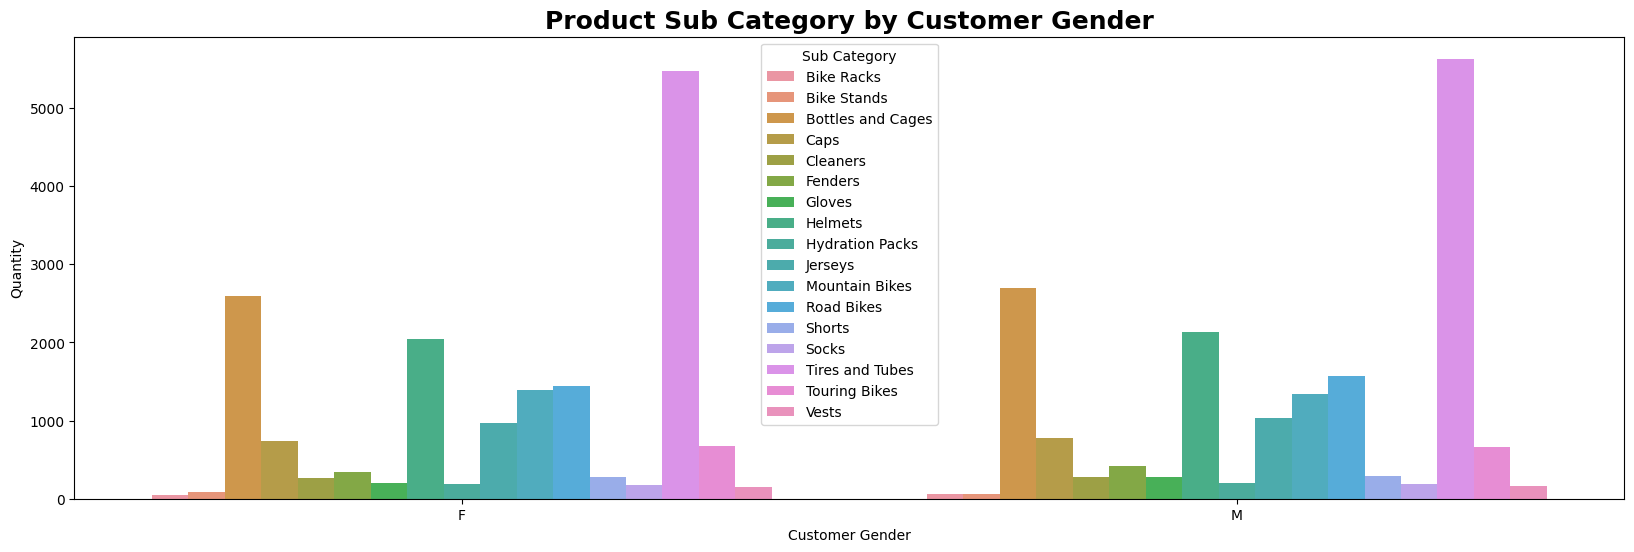

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(y='Quantity',x='Customer Gender',hue='Sub Category',data=Sales_gen);

plt.title("Product Sub Category by Customer Gender",
          fontsize=18,
          fontweight="bold");

Del gráfico se desprende que la principal subcategoría es Tires a Tubes con una diferencia de casi el doble de ventas que la categoría que le sigue en cantidades.

Esto da un indicio importante para la empresa: este es un subproducto que no se puede descuidar y para el cual se debe preveer tener stock constante.

Ahora que se conoce cual es el subproducto dentro de Accesories que tiene un mayor volumen de ventas se vuelte interesante conocer la relación de los ubproductos con la ganancia. Esto nos lleva a realizar la siguiente pregunta:

- ¿Cuál es el subproducto que nos brinda una mayor ganancia?

In [ ]:
# Sumamos costo total y precio de venta total para cada sub categoría

Sales_revenue_product=Sales[['Sub Category','Total Cost','Total Price']].groupby(by=['Sub Category']).sum().reset_index()

Sales_revenue_product['Revenue']=Sales_revenue_product['Total Price']-Sales_revenue_product['Total Cost']

Sales_revenue_product.head()

,Sub Category,Total Cost,Total Price,Revenue
0,Bike Racks,105960.0,140854.0,34894.0
1,Bike Stands,125610.0,150911.0,25301.0
2,Bottles and Cages,579820.0,709379.0,129559.0
3,Caps,212382.0,255992.0,43610.0
4,Cleaners,68223.0,82887.0,14664.0


In [ ]:
#Calculamos la ganancia anual correspondiente a cada sub categoría y su valor porcentual

Sales_revenue_product["Revenue %"]=Sales_revenue_product["Revenue"]/Sales_revenue_product["Revenue"].sum()*100

Sales_revenue_product.sort_values(by="Revenue %", ascending=False)

,Sub Category,Total Cost,Total Price,Revenue,Revenue %
7,Helmets,2219735.0,2738210.0,518475.0,22.925202
14,Tires and Tubes,2353791.0,2865915.0,512124.0,22.644383
9,Jerseys,1533234.0,1834110.0,300876.0,13.303714
10,Mountain Bikes,5031829.0,5176456.0,144627.0,6.394914
2,Bottles and Cages,579820.0,709379.0,129559.0,5.728659
11,Road Bikes,3823823.0,3921989.0,98166.0,4.340567
15,Touring Bikes,2293102.0,2387910.0,94808.0,4.192088
12,Shorts,602140.0,689184.0,87044.0,3.848790
8,Hydration Packs,330935.0,403276.0,72341.0,3.198673
5,Fenders,257801.0,329204.0,71403.0,3.157198


In [ ]:
#Gradicar la información obtenida para facilitar la visualización de los resultados

sub_categories = Sales_revenue_product['Sub Category']
revenues = Sales_revenue_product['Revenue']


fig = go.Figure(data=go.Bar(x=sub_categories, y=revenues))

colors = ['salmon' if sub_cat in ['Helmets', 'Tires and Tubes'] else 'steelblue' for sub_cat in sub_categories]
fig.update_traces(marker_color=colors)

for i in range(100000, int(max(revenues)), 100000):
    fig.add_shape(
        type="line",
        x0=-0.5,
        y0=i,
        x1=len(sub_categories) - 0.5,
        y1=i,
        line=dict(color="gray", width=1, dash="solid"),
        layer="below")

fig.update_layout(
    title='Revenue by Sub Category',
    xaxis_title='Sub Category',
    yaxis_title='Revenue',
    plot_bgcolor='white')

fig.show()


Las sub categorías que generan más ganancia neta son Helmets y Tires and Tubes.

**MANEJO DE STOCK**

- ¿Se puede modificar el manejo de stock para generar una mayor ganancia dentro de la categoría Tires and Tubes? Categoría con mayores ventas y ganancia neta.

In [ ]:
# Se filtra el DataSet para enfocarnos en la sub categoría de interés

Sales_TT = Sales[Sales["Sub Category"] == 'Tires and Tubes']
Sales_TT.head()

,Date,Year,Month Num,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Cost,Total Price,Revenue
0,02/19/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0
2,02/27/16,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0
3,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0
4,03/12/16,2016.0,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0
5,04/08/16,2016.0,4,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,66.00,78.000000,66.0,78.0,12.0


In [ ]:
# Se compara el costo unitario promedio y el precio de venta unitario promedio de cada mes del año

Sales_mean_cost=Sales_TT[['Month Num','Unit Cost','Unit Price']].groupby(by=['Month Num']).mean().reset_index()

Sales_mean_cost['Revenue']=Sales_mean_cost['Unit Price']-Sales_mean_cost['Unit Cost']

Sales_mean_cost


,Month Num,Unit Cost,Unit Price,Revenue
0,1,129.530940,165.729144,36.198204
1,2,128.462155,165.204675,36.742520
2,3,117.604118,149.503700,31.899582
3,4,127.175688,163.789474,36.613785
4,5,121.712308,156.467949,34.755641
5,6,127.825092,163.994035,36.168943
6,7,126.524291,159.537223,33.012932
7,8,127.986385,145.058559,17.072173
8,9,137.462221,155.842337,18.380116
9,10,125.958934,142.283873,16.324939


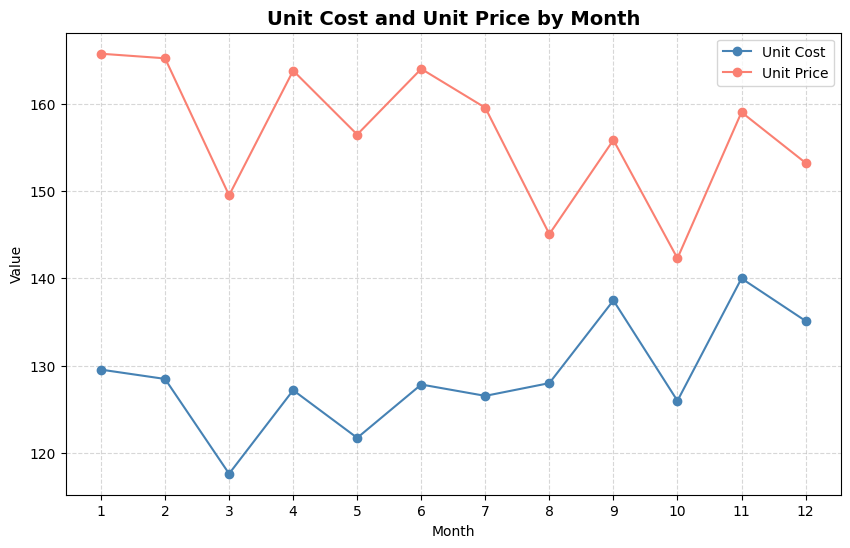

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura

ax.plot(Sales_mean_cost['Month Num'], Sales_mean_cost['Unit Cost'], label='Unit Cost', color = 'steelblue', marker='o')
ax.plot(Sales_mean_cost['Month Num'], Sales_mean_cost['Unit Price'], label='Unit Price', color = 'salmon', marker='o')

ax.legend(loc='upper right')

plt.xlabel('Month')
plt.ylabel('Value')  # Agrega etiquetas a los ejes x e y
plt.title('Unit Cost and Unit Price by Month', fontsize=14, fontweight='bold')  # Agrega un título al gráfico

plt.xticks(Sales_mean_cost['Month Num'])  # Ajusta los marcadores del eje x para que coincidan con los meses
plt.grid(True, linestyle='--', alpha=0.5)  # Agrega una cuadrícula al gráfico

plt.show()


Entre los meses de enero y julio hay mayor diferencia entre precio de venta y costo unitario en la sub categoría Tires and Tubes.

Otra forma de generar más ganancias, además de aumentar las ventas, es disminuir los costos asociados a las ventas. Los meses en donde el costo unitario es menor son marzo y mayo. Sería conveniente generar stock en estos meses para maximizar las ganancias.

- ¿Cuánto dinero más se puede ganar si se reponen los productos de la sub categoría Tires and Tubes únicamente en marzo y octubre?

In [ ]:
#La ganancia anual actual teniendo en cuenta los promedios mensuales es de:

Sales_mean_cost['Revenue'].sum()


334.32206072588474

In [ ]:
# Compra de los productos solo en marzo y octubre

Sales_mean_cost['Unit Cost 2'] = [125.958934 if Month_Num < 3 or Month_Num > 9 else 117.604118 for Month_Num in Sales_mean_cost['Month Num']]

Sales_mean_cost['Revenue2'] = Sales_mean_cost['Unit Price'] - Sales_mean_cost['Unit Cost 2']

Sales_mean_cost


,Month Num,Unit Cost,Unit Price,Revenue,Unit Cost 2,Revenue2
0,1,129.530940,165.729144,36.198204,125.958934,39.770210
1,2,128.462155,165.204675,36.742520,125.958934,39.245741
2,3,117.604118,149.503700,31.899582,117.604118,31.899582
3,4,127.175688,163.789474,36.613785,117.604118,46.185356
4,5,121.712308,156.467949,34.755641,117.604118,38.863831
5,6,127.825092,163.994035,36.168943,117.604118,46.389917
6,7,126.524291,159.537223,33.012932,117.604118,41.933105
7,8,127.986385,145.058559,17.072173,117.604118,27.454441
8,9,137.462221,155.842337,18.380116,117.604118,38.238219
9,10,125.958934,142.283873,16.324939,125.958934,16.324939


In [ ]:
#La suma anual de las ganancias promedio sería de:

Sales_mean_cost['Revenue2'].sum()

426.6388565723501

In [ ]:
Sales_mean_cost['Revenue2'].sum()/Sales_mean_cost['Revenue'].sum()

1.276131331704602

Si tuvieramos el espacio y los medios para comprar los productos solamente dos veces al año, podríamos aumentar la ganancia anual promedio en un 27%.

Este puede ser un aspecto para seguir explorando con el fin de aumentar las ganancias netas. Además, si logramos hacer un modelo de estimación de las ventas en el año próximo, podemos optimizar la compra de stock.


## Conclusiones



**En relación a los consumidores:**

1.   No se encontraron diferencias significativas entre las compras y el género de los consumidores
2.   El consumidor promedio tiene 36 años. La mayoría de las compras son llevadas a cabo por consumidores ente 25 y 40 años.
3.   El país con mayores consumidores es Estados Unidos


De esta visualización se desprende la importancia de cuidar a los consumidores de entre 25 y 45 años y la necesidad de conseguir la fidelidad de los consumidores jóvenes.


**En relación a los países:**

1.   La distribución de las ventas por categoría se comporta de manera similar en los cuatro países analizados.
2.   El país con mayor ganancia es Estados Unidos.

**En relación a las ventas:**

1.   La categoría con mayor ingreso por ventas es Bikes, seguido de Accesories y por último Clothing. La categoría de productos con mayores compras es Accesories.
2. La principal subcategoría vendida fue Tires and Tubes. La misma se encuentra dentro de Accesories.
3. Entre los meses de enero y julio hay mayor diferencia entre el precio de venta y costo unitario en la sub categoría Tires and Tubes. Obteniendo mayores ganancias.
El menor costo unitario se encuentra en marzo y mayo. Si se tuviera el espacio y los medios para comprar el stock de Tires and Tubes en estos meses, solamente dos veces al año, se podría aumentar la ganancia anual promedio en un 27%.






## Insights



El interés principal de la empresa es maximizar las ganancias que se obtienen y aumentar el volumen de ventas de sus productos.

Teniendo esto en cuenta se encontraron diferentes herramientas para lograrlo:

1.   **ESTRATEGIAS CLIENTES**

    En relación a los clientes lo principal es focalizar los esfuerzos en mantener y aumentar los correspondeintes al público objetivo. Esto es adultos entre 25 y 45 años que residen en Estados Unidos.

    Para llegar adelante esta estrategia es importante utilizar los canales de marketing adecuados para estos clientes y buscar en los productos ofrecidos una diferenciación con el resto del mercado.

    Es importante consolidar los clientes jóvenes y asegurar futuras compras del público objetivo.

    Este proceso es un proceso continuo por lo que es importante realizar un seguimiento de los resultados y ajustar según necesidad.



2.  **ESTRATEGIAS PRODUCTO**

    Existen difernetes estrategias vinculadas a los productos. Del análisis de información se desprende que para poder centralizar las ventas y focalizar los recursos la venta de productos debe centralizarse en Estados Unidos.

    Todas las estrategias que se encuentren vinculadas a un aumento en la ganancia de productos deberán enfocarse a productos de la categoría de Accesories por su alto volumen de venta y a Bikes por su alto ingreso monetario. La categoría de clothing se debe mantener para atraer clientes.

    La publicidad que alcance el público debería apuntar a aquellos productos que brinden la mayor ganancia, Tires and Tubes y Helmets, y encontrar en estos productos un diferencial.

    Aquellas categorías de producto que no generen practicamente ganancias, como cleaners o socks, deberían ser reevaluadas en relación a sus costos, su calidad y su precio de venta en el mercado.

3.   **ESTRATEGIAS STOCK**

    Para poder asegurar la consolidación y fidelidad de los clientes es importante asegurar un stock de todos los productos, principalmente aquellos que tengan un alto volumen de venta y sean el diferencial de la empresa.

    Debido a la variación en costo que tienen los productos en los diferentes meses del año y las variaciones en ventas, el manejo de stock puede generar un aumento o una disminución de las ganancias para una empresa.

    Para que esto sea ganancia es importante considerar que todos aquellos productos que generen un impacto en las ganancias se debe realizar un manejo de stock que coincida con la baja demanda en la compra de stock. Por ejemplo, si se tuviera el espacio y los medios para comprar el stock de Tires and Tubes en los meses de marzo y mayo, solamente dos veces al año, se podría aumentar la ganancia anual promedio en un 27%.

    Este último es un ejercicio que se debe hacer para todos los productos que tengan un impacto en las ganancias de la empresa.




